<a href="https://colab.research.google.com/github/DavidKimDY/layers-and-filters-to-visualize/blob/master/layers_and_filters_to_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as k
from tensorflow import keras

print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [2]:
dataset_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_label) = dataset_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

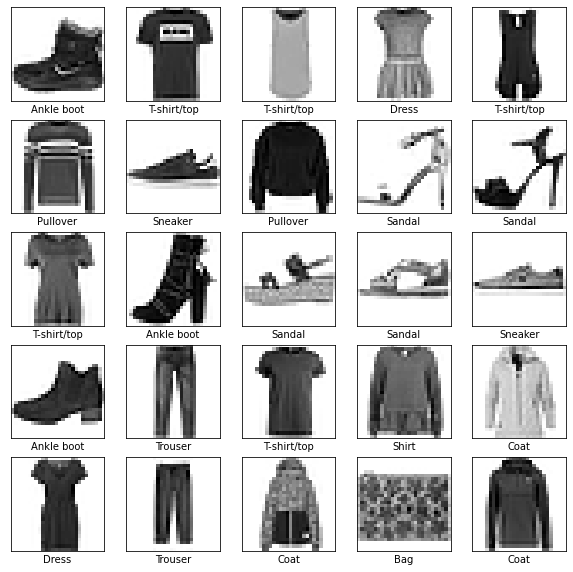

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(train_images[i]), cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, 'relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(10, 'softmax'))

In [6]:
model.compile(optimizer='Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model.fit(train_images, train_labels , batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 26s 43ms/step - loss: 0.4582 - accuracy: 0.8380
Epoch 2/5
600/600 [==============================] - 26s 43ms/step - loss: 0.3004 - accuracy: 0.8919
Epoch 3/5
600/600 [==============================] - 26s 43ms/step - loss: 0.2595 - accuracy: 0.9057
Epoch 4/5
600/600 [==============================] - 26s 43ms/step - loss: 0.2300 - accuracy: 0.9157
Epoch 5/5
600/600 [==============================] - 25s 42ms/step - loss: 0.2085 - accuracy: 0.9229


In [8]:
model.evaluate(test_images, test_label, verbose = 2)

313/313 - 2s - loss: 0.2439 - accuracy: 0.9110


[0.24386660754680634, 0.9110000133514404]

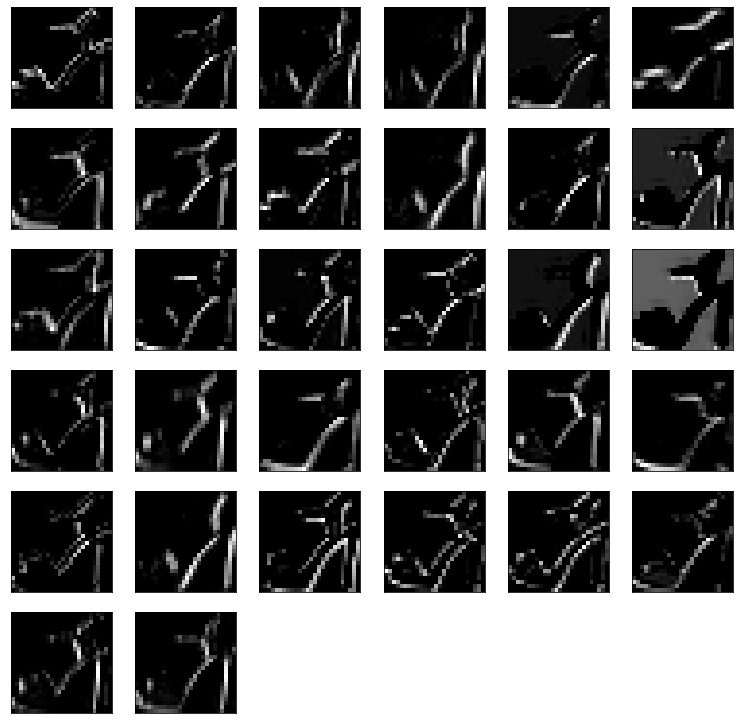

In [52]:
def layer_to_visualize(layer, image_number):
  image = train_images[image_number]
  to_visualize = k.function([model.input], [layer.output])
  visuals = to_visualize([np.expand_dims(image, axis=0)])[0]

  filter_size = visuals.shape[-1]
  n = np.ceil(np.sqrt(filter_size))
  
  plt.figure(figsize=(13,13))
  for i in range(filter_size):
    plt.subplot(n,n,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(visuals[0, :, :, i], cmap = 'gray')
  
layer_to_visualize(model.layers[1], 9)

(3, 3, 1, 32)


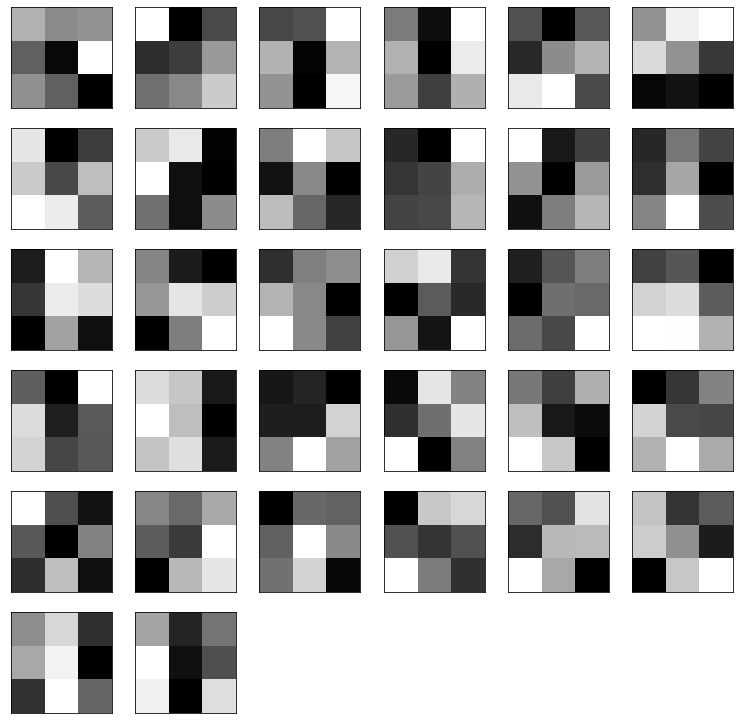

In [51]:
l1 = model.layers[0]
w1, b1 = l1.get_weights()

plt.figure(figsize=(13,13))
n = np.ceil(np.sqrt(w1.shape[-1]))
print(w1.shape)

for i in range(w1.shape[-1]):
  plt.subplot(n,n,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(w1[:,:,0,i], cmap = plt.cm.binary)